# Google Playstore ETL and EDA

### I picked this dataset because it caught my eye. It looks rich in information of different kinds and valuable insights can be taken away.

In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
sns.set()

### At first glance the data looks rich in different information but there are problems with the way column entries are. There is special characters or letters in them often and their data types are objects aka. strings. This needs to be changed to integers or floats if we want to do matematical operations later with those columns.

Columns Description:

    App: The name of the application.
    Category: The category to which the app belongs (e.g., FAMILY, PRODUCTIVITY, SPORTS, DATING).
    Rating: The average user rating of the app (on a scale of 0 to 5).
    Reviews: The number of user reviews the app has received.
    Size: The size of the app (e.g., 4.1M for 4.1 megabytes, or "Varies with device" if the size depends on the device).
    Installs: The number of times the app has been installed (e.g., 5,000+, 1,000,000+).
    Price: The price of the app (0 for free apps).
    Content Rating: The target audience for the app (e.g., Teen, Everyone, Everyone 10+).
    Genres: The genre(s) of the app (e.g., Education, Productivity, Sports).
    Released: The date when the app was Released (e.g., September 12, 2017).
    Current Ver: The current version of the app (e.g., 7.2, 1.7.9, or "Varies with device").
    Android Ver: The minimum Android version required to run the app (e.g., 2.3 and up, 4.0.3 and up, or "Varies with device").

In [265]:
data_raw = pd.read_csv('data/googleplaystore_updated.csv')
data_raw.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Released,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",0,Everyone,Art & Design,"Aughust 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [266]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10841 non-null  int64  
 1   App             10841 non-null  object 
 2   Category        10841 non-null  object 
 3   Rating          9367 non-null   float64
 4   Reviews         10841 non-null  object 
 5   Size            10841 non-null  object 
 6   Installs        10841 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Released        10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


### There is null values in some of the columns. Usually it is more complicated to deal with them but in this case I drop to the lowest column, because I want a clean analysis.

In [267]:
data_raw.columns = data_raw.columns.str.lower()
data_no_na = data_raw.dropna(axis=0)
data_no_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   unnamed: 0      9360 non-null   int64  
 1   app             9360 non-null   object 
 2   category        9360 non-null   object 
 3   rating          9360 non-null   float64
 4   reviews         9360 non-null   object 
 5   size            9360 non-null   object 
 6   installs        9360 non-null   object 
 7   price           9360 non-null   object 
 8   content rating  9360 non-null   object 
 9   genres          9360 non-null   object 
 10  released        9360 non-null   object 
 11  current ver     9360 non-null   object 
 12  android ver     9360 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1023.8+ KB


In [268]:
data_no_na.duplicated().value_counts()

False    9360
Name: count, dtype: int64

In [269]:
data_no_na.drop('unnamed: 0',axis = 1,inplace=True)

In [270]:
data_no_na.head()

,app,category,rating,reviews,size,installs,price,content rating,genres,released,current ver,android ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",0,Everyone,Art & Design,"Aughust 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### I replace some special characters in the installs column and there is duplicated values in the app column. That means some of the names of the apps repeat. We drop those values.

In [271]:
data_no_na['installs'] = data_no_na['installs'].str.replace("+","")

In [272]:
data_no_na['app'].duplicated().value_counts()

app
False    8190
True     1170
Name: count, dtype: int64

In [273]:
data_no_na.drop_duplicates(subset='app',inplace=True)

In [274]:
data_no_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8190 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app             8190 non-null   object 
 1   category        8190 non-null   object 
 2   rating          8190 non-null   float64
 3   reviews         8190 non-null   object 
 4   size            8190 non-null   object 
 5   installs        8190 non-null   object 
 6   price           8190 non-null   object 
 7   content rating  8190 non-null   object 
 8   genres          8190 non-null   object 
 9   released        8190 non-null   object 
 10  current ver     8190 non-null   object 
 11  android ver     8190 non-null   object 
dtypes: float64(1), object(11)
memory usage: 831.8+ KB


In [275]:
data_no_na.head(5)

,app,category,rating,reviews,size,installs,price,content rating,genres,released,current ver,android ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000",0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000",0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000",0,Everyone,Art & Design,"Aughust 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000",0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000",0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### After checking the release date column there is spelling errors in some of the months. That needs to be corrected. August is spelled Aughust and September is Septemter. I replace those in every entry point to be able to pass the column in a date time format.

In [276]:
data_no_na[data_no_na['released'].str.startswith('Aug')]

,app,category,rating,reviews,size,installs,price,content rating,genres,released,current ver,android ver
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000",0,Everyone,Art & Design,"Aughust 1, 2018",1.2.4,4.0.3 and up
14,3D Color Pixel by Number - Sandbox Art Coloring,ART_AND_DESIGN,4.4,1518,37M,"100,000",0,Everyone,Art & Design,"Aughust 3, 2018",1.2.3,2.3 and up
18,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216,39M,"5,000,000",0,Everyone,Art & Design,"Aughust 3, 2018",2.2.5,4.0.3 and up
29,Easy Realistic Drawing Tutorial,ART_AND_DESIGN,4.1,223,4.2M,"100,000",0,Everyone,Art & Design,"Aughust 22, 2017",1.0,2.3 and up
36,UNICORN - Color By Number & Pixel Art Coloring,ART_AND_DESIGN,4.7,8145,24M,"500,000",0,Everyone,Art & Design;Creativity,"Aughust 2, 2018",1.0.9,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...
10793,Sid Story,GAME,4.4,28510,78M,"500,000",0,Teen,Card,"Aughust 1, 2018",2.6.6,4.0.3 and up
10802,FR: My Famous Lover,FAMILY,4.0,185,28M,"10,000",0,Teen,Entertainment,"Aughust 6, 2015",1.3.0,3.0 and up
10803,Fatal Raid - No.1 Mobile FPS,GAME,4.3,56496,81M,"1,000,000",0,Teen,Action,"Aughust 7, 2018",1.5.447,4.0 and up
10805,Scoreboard FR,LIFESTYLE,4.3,3,15M,100,0,Everyone,Lifestyle,"Aughust 7, 2018",2.1,4.2 and up


In [277]:
data_no_na['released'] =data_no_na['released'].str.replace('Aughust', 'August')
data_no_na['released'] =data_no_na['released'].str.replace('Septemter', 'September')
data_no_na['released'] = pd.to_datetime(data_no_na['released'], format='mixed')

In [278]:
data_no_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8190 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   app             8190 non-null   object        
 1   category        8190 non-null   object        
 2   rating          8190 non-null   float64       
 3   reviews         8190 non-null   object        
 4   size            8190 non-null   object        
 5   installs        8190 non-null   object        
 6   price           8190 non-null   object        
 7   content rating  8190 non-null   object        
 8   genres          8190 non-null   object        
 9   released        8190 non-null   datetime64[ns]
 10  current ver     8190 non-null   object        
 11  android ver     8190 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(10)
memory usage: 831.8+ KB


In [279]:
data_no_na.columns = data_no_na.columns.str.replace(" ","_")
data_no_na.columns

Index(['app', 'category', 'rating', 'reviews', 'size', 'installs', 'price',
       'content_rating', 'genres', 'released', 'current_ver', 'android_ver'],
      dtype='object')

In [280]:
data_no_na['released'].max()

Timestamp('2018-08-08 00:00:00')

In [281]:
data_no_na['released'].min()

Timestamp('2010-05-21 00:00:00')

In [282]:
data_no_na['genres'].nunique()

114

### I replace also some characters in 2 columns and pass them as integer values.

In [283]:
data_no_na['installs'] = data_no_na['installs'].str.replace(',',"")
data_no_na['price'] = data_no_na['price'].str.replace("$","")
data_no_na['installs'] = data_no_na['installs'].astype(int)
data_no_na['reviews'] = data_no_na['reviews'].astype(int)

In [284]:
data_no_na['price'].unique()

array(['0', '4.99', '3.99', '6.99', '7.99', '5.99', '2.99', '3.49',
       '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00', '24.99',
       '11.99', '79.99', '16.99', '14.99', '29.99', '12.99', '2.49',
       '10.99', '1.50', '19.99', '15.99', '33.99', '39.99', '3.95',
       '4.49', '1.70', '8.99', '1.49', '3.88', '399.99', '17.99',
       '400.00', '3.02', '1.76', '4.84', '4.77', '1.61', '2.50', '1.59',
       '6.49', '1.29', '299.99', '379.99', '37.99', '18.99', '389.99',
       '8.49', '1.75', '14.00', '2.00', '3.08', '2.59', '19.40', '3.90',
       '4.59', '15.46', '3.04', '13.99', '4.29', '3.28', '4.60', '1.00',
       '2.95', '2.90', '1.97', '2.56', '1.20'], dtype=object)

### Price can be passed only as a float value

In [285]:
data_no_na['price'] = data_no_na['price'].astype(float)

In [286]:
data_no_na['price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

In [289]:
data_no_na['content_rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

### Some preliminary descriptive statistics shows that the minimum of rating is 1 and the average is 4.18 out of 5. We can see that there is apps with very little reviews and a lot of reviews. The average price is around 1 dollar and the maximum most expensive app is 400 dollars.

In [290]:
data_no_na.describe()

,rating,reviews,installs,price,released
count,8190.000000,8.190000e+03,8.190000e+03,8190.000000,8190
mean,4.173321,2.554354e+05,9.171613e+06,1.038342,2017-11-05 08:54:09.230769408
min,1.000000,1.000000e+00,1.000000e+00,0.000000,2010-05-21 00:00:00
25%,4.000000,1.260000e+02,1.000000e+04,0.000000,2017-08-17 00:00:00
50%,4.300000,3.009500e+03,1.000000e+05,0.000000,2018-05-20 00:00:00
75%,4.500000,4.391425e+04,1.000000e+06,0.000000,2018-07-19 00:00:00
max,5.000000,7.815831e+07,1.000000e+09,400.000000,2018-08-08 00:00:00
std,0.536691,1.986309e+06,5.827170e+07,16.864040,NaN


### There is some nice description in categories column, which gives me the idea that analysis can be done on how different categories of apps perform in different metrics , for example if a certain category like Education apps has become popular over the years, which category has the most installations or rating and so on.

In [291]:
data_no_na['category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

### In the size column I run into an unique problem. The stings are entered as 25M for megabytes or 2.8M for the same. Then there is other entries like 526K for kilobytes or 8.5k. To be able to convert all this values into a single unit is kind of tricky because the letter M and k need to be replaced first and the values should be multiplied by 1024 but only the megabyte ones perhaps, because we need same units. One of the issues is also the point in the middle which makes the multiplication process more complicated. I spend some time contemplating this and if I can't find a solution I will just remove the column and exclude it from the analysis.

In [292]:
data_no_na.drop('size',axis = 1,inplace=True)

### I decide to drop the column.

In [295]:
data_no_na['android_ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up', '3.2 and up',
       '4.4W and up', '5.1 and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up'], dtype=object)

### I replace some letter in the android version column also to get more clear values

In [296]:
data_no_na['android_ver'] = data_no_na['android_ver'].str.replace(" and up","+")

In [297]:
data_no_na['android_ver'] = data_no_na['android_ver'].str.replace("Varies with device","VwD")

In [298]:
data_no_na['android_ver'].unique()

array(['4.0.3+', '4.2+', '4.4+', '2.3+', '3.0+', '4.1+', '4.0+', '2.3.3+',
       'VwD', '2.2+', '5.0+', '6.0+', '1.6+', '1.5+', '2.1+', '7.0+',
       '4.3+', '4.0.3 - 7.1.1', '2.0+', '3.2+', '4.4W+', '5.1+', '7.1+',
       '7.0 - 7.1.1', '8.0+', '5.0 - 8.0', '3.1+', '2.0.1+',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0+'], dtype=object)

In [299]:
data_no_na['content_rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

### The target audience if in a column called content rating. A google search shows that the teen years are between 13 and 19 , so maybe I can reshape this column into numerical values too.

In [300]:
data_no_na['content_rating'] = data_no_na['content_rating'].map({'Everyone': '0+',
                                                                    'Teen': '13-19',
                                                                    'Everyone 10+': '10+',
                                                                    'Mature 17+': '17+', 
                                                                    'Adults only 18+': '18+',
                                                                    'Unrated': 'No rating available'}) 

In [301]:
data_no_na['content_rating'].unique()

array(['0+', '13-19', '10+', '17+', '18+', 'No rating available'],
      dtype=object)

### Now a lot of categorical and numerical variables exist in the columns to be able to do some analysis. I will first break apart the release date column into years, months and days to be able to see trends over time.

In [304]:
data_clean = data_no_na.reset_index(drop=True)

In [306]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   app             8190 non-null   object        
 1   category        8190 non-null   object        
 2   rating          8190 non-null   float64       
 3   reviews         8190 non-null   int32         
 4   installs        8190 non-null   int32         
 5   price           8190 non-null   float64       
 6   content_rating  8190 non-null   object        
 7   genres          8190 non-null   object        
 8   released        8190 non-null   datetime64[ns]
 9   current_ver     8190 non-null   object        
 10  android_ver     8190 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(2), object(6)
memory usage: 640.0+ KB


In [307]:
data_clean['year']= data_clean['released'].dt.year
data_clean['month']= data_clean['released'].dt.month
data_clean["weekday"]=data_clean["released"].dt.dayofweek
data_clean['day']= data_clean['released'].dt.day

### Now we have specific year of release , month and day. We can look at different metrics over the years and months.

In [308]:
data_clean.head(4)

,app,category,rating,reviews,installs,price,content_rating,genres,released,current_ver,android_ver,year,month,weekday,day
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,0.0,0+,Art & Design,2018-01-07,1.0.0,4.0.3+,2018,1,6,7
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,0.0,0+,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3+,2018,1,0,15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,0.0,0+,Art & Design,2018-08-01,1.2.4,4.0.3+,2018,8,2,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,0.0,13-19,Art & Design,2018-06-08,Varies with device,4.2+,2018,6,4,8


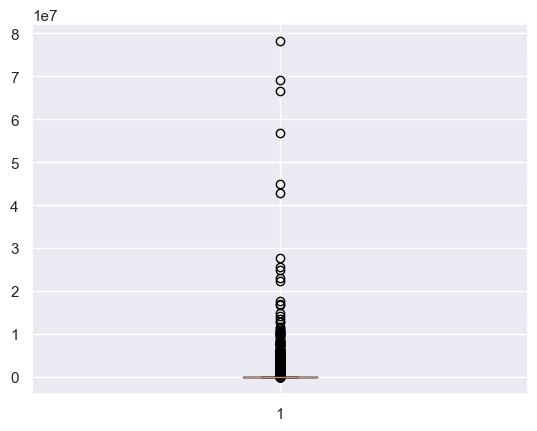

In [309]:
plt.boxplot(x = data_clean['reviews']);

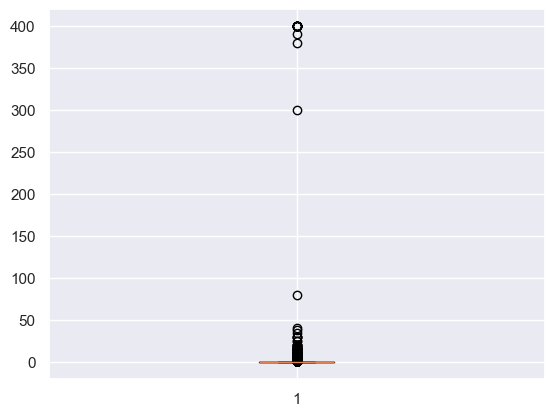

In [310]:
plt.boxplot(x = data_clean['price']);

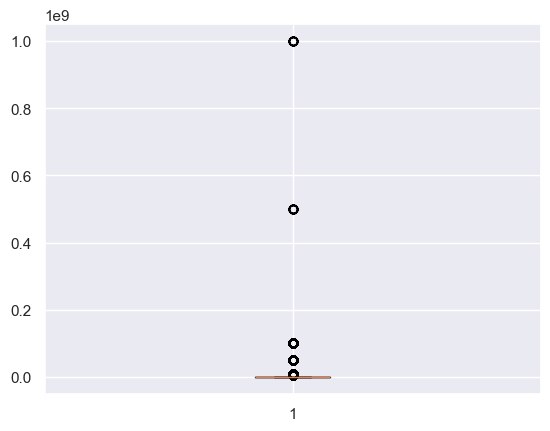

In [311]:
plt.boxplot(x = data_clean['installs']);

### There is some outliers in Installed apps , Price and Reviews but in our case that is expected. Some apps will always outperform others in all metrics. I create a new column called revenue to see how many apps were sold based on the price at the time and number of installation. This won't be a perfect metric because these variable can change over time and there are other methods for revenue, but it will give us some rough idea about revenue. The maximum revenue seems to be 69 million dollars. And surprisingly it's Minecraft.

In [312]:
data_clean['revenue'] = data_clean['installs']*data_clean['price']

In [315]:
data_clean['revenue'].max()

69900000.0

In [316]:
data_clean[data_clean['revenue'] == 69900000]

,app,category,rating,reviews,installs,price,content_rating,genres,released,current_ver,android_ver,year,month,weekday,day,revenue
1661,Minecraft,FAMILY,4.5,2376564,10000000,6.99,10+,Arcade;Action & Adventure,2018-07-24,1.5.2.1,VwD,2018,7,1,24,69900000.0


In [317]:
data_revenue = data_clean.groupby('year')['revenue'].sum().reset_index()
data_revenue

,year,revenue
0,2010,0.000000e+00
1,2011,6.989000e+03
2,2012,2.997450e+04
3,2013,1.770055e+06
4,2014,8.414479e+06
5,2015,1.203099e+07
6,2016,1.694038e+07
7,2017,4.143008e+07
8,2018,2.103536e+08


### One insight we get is that revenue has been increasing over the year significantly , which is no suprise since the app sector has been developping in the last decades rapidly. The amount of apps has also been increasing , which is expexted.

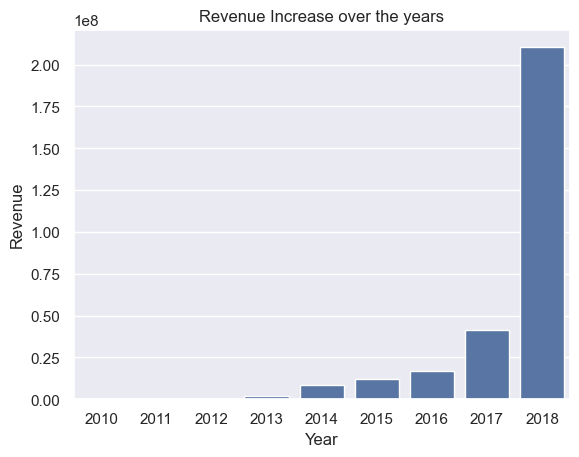

In [318]:
sns.barplot(x = data_revenue['year'],y = data_revenue['revenue'])
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Revenue Increase over the years');

In [319]:
data_apps = data_clean.groupby('year')['app'].count().reset_index()
data_apps

,year,app
0,2010,1
1,2011,15
2,2012,21
3,2013,91
4,2014,184
5,2015,379
6,2016,628
7,2017,1425
8,2018,5446


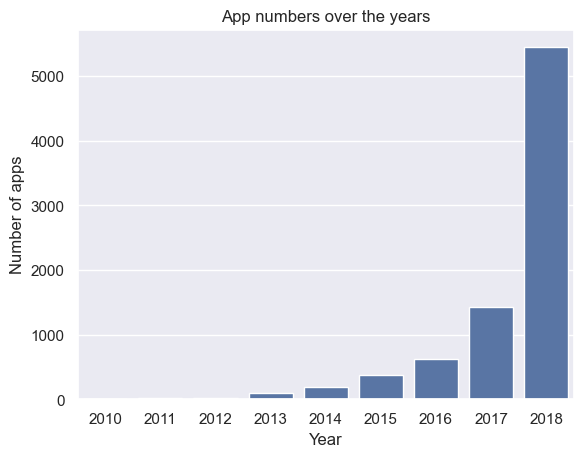

In [320]:
sns.barplot(x = data_apps['year'],y = data_apps['app'])
plt.xlabel('Year')
plt.ylabel('Number of apps')
plt.title('App numbers over the years');

### I remembered to plot also number of apps released summed up across the months. It is interesting that the summer months see the most releases.

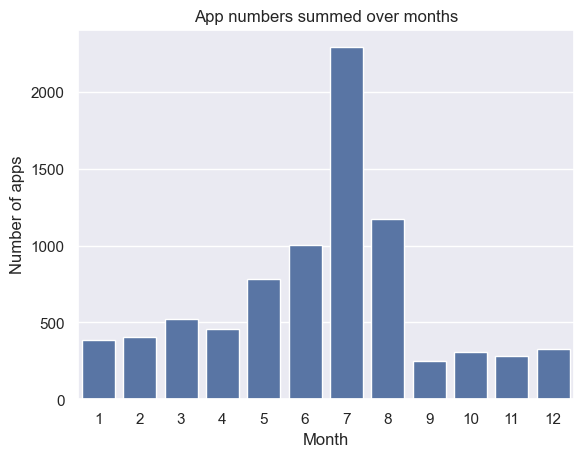

In [321]:
data_apps_monthly = data_clean.groupby('month')['app'].count().reset_index()
sns.barplot(x = data_apps_monthly['month'],y = data_apps_monthly['app'])
plt.xlabel('Month')
plt.ylabel('Number of apps')
plt.title('App numbers summed over months');

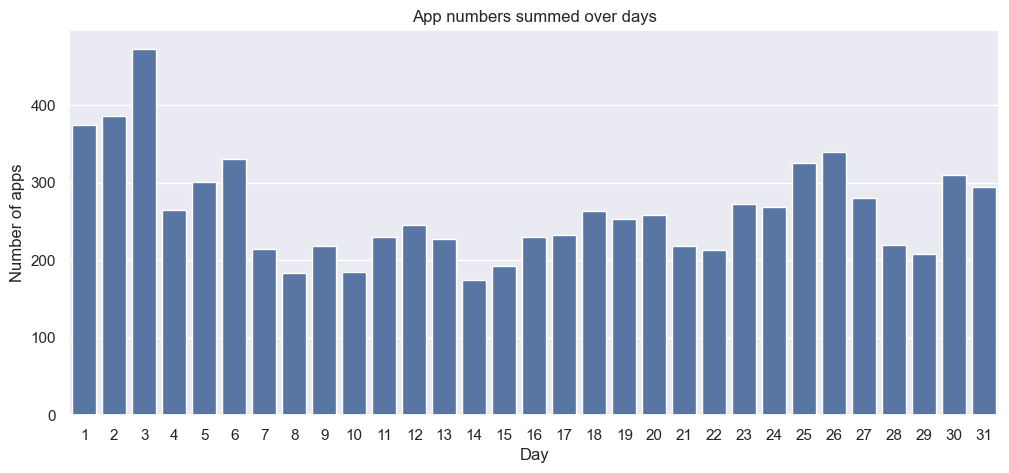

In [322]:
data_apps_daily = data_clean.groupby('day')['app'].count().reset_index()
plt.figure(figsize=(12,5))
sns.barplot(x = data_apps_daily['day'],y = data_apps_daily['app'])
plt.xlabel('Day')
plt.ylabel('Number of apps')
plt.title('App numbers summed over days');

### It seems more app are release from Friday to Monday than on the Weekends, which is normal since most companies propably don't work on those days. The work week seems to gradually increase the amount of app until Thursday then there is a slight drop on Friday.

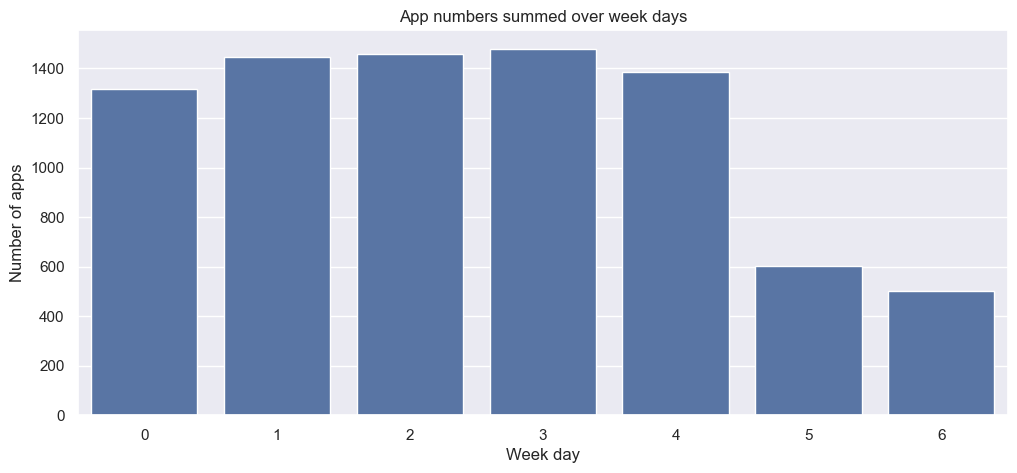

In [323]:
data_apps_daily = data_clean.groupby('weekday')['app'].count().reset_index()
plt.figure(figsize=(12,5))
sns.barplot(x = data_apps_daily['weekday'],y = data_apps_daily['app'])
plt.xlabel('Week day')
plt.ylabel('Number of apps')
plt.title('App numbers summed over week days');

### I check if Education category apps have been rising in over the years and surprise , surprise they are.

In [351]:
data_education_category = data_clean[data_clean['category'].str.startswith('EDU')]
data_education_category.head(5)

,app,category,rating,reviews,installs,price,content_rating,genres,released,current_ver,android_ver,year,month,weekday,day,revenue
522,Duolingo: Learn Languages Free,EDUCATION,4.7,6289924,100000000,0.0,0+,Education;Education,2018-08-01,Varies with device,VwD,2018,8,2,1,0.0
523,TED,EDUCATION,4.6,181893,10000000,0.0,10+,Education,2018-07-27,3.2.5,4.1+,2018,7,4,27,0.0
524,English Communication - Learn English for Chin...,EDUCATION,4.7,2544,100000,0.0,0+,Education,2017-12-29,3.1,4.0+,2017,12,4,29,0.0
525,Khan Academy,EDUCATION,4.6,85375,5000000,0.0,0+,Education,2018-07-27,5.0.0,4.1+,2018,7,4,27,0.0
526,Learn English with Wlingua,EDUCATION,4.7,314299,10000000,0.0,0+,Education,2018-05-02,1.94.9,4.0+,2018,5,2,2,0.0


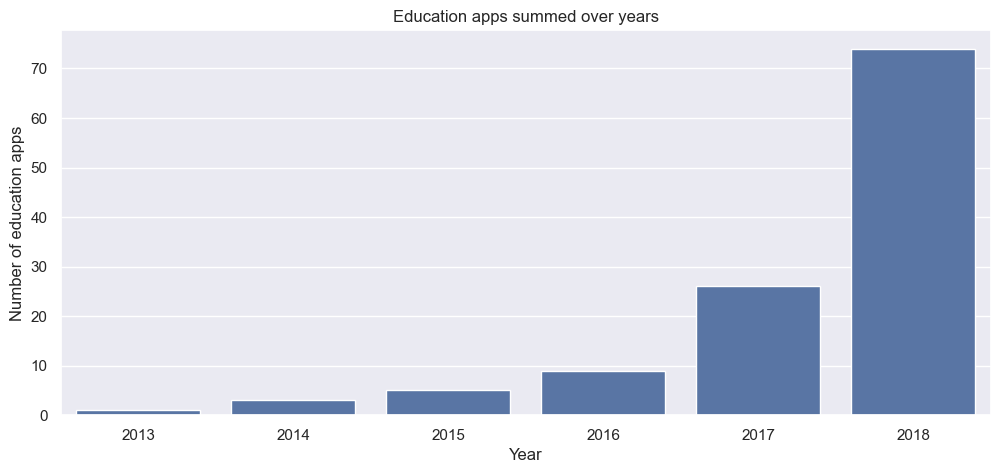

In [352]:
data_education_category_grouped = data_education_category.groupby('year')['app'].count().reset_index()
plt.figure(figsize=(12,5))
sns.barplot(x = data_education_category_grouped['year'],y = data_education_category_grouped['app'])
plt.xlabel('Year')
plt.ylabel('Number of education apps')
plt.title('Education apps summed over years');

## I create a boolean mask to see the top rated apps but there is a lot with a 5 star rating. Instead maybe I can focus on what category the top rated apps are.

In [324]:
data_top_rated = data_clean[data_clean['rating'] == 5]
data_top_rated

,app,category,rating,reviews,installs,price,content_rating,genres,released,current_ver,android_ver,year,month,weekday,day,revenue
280,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,1000,0.0,0+,Comics,2018-06-26,2.0,4.0.3+,2018,6,1,26,0.0
494,American Girls Mobile Numbers,DATING,5.0,5,1000,0.0,17+,Dating,2018-07-17,3.0,4.0.3+,2018,7,1,17,0.0
496,Awake Dating,DATING,5.0,2,100,0.0,17+,Dating,2018-07-24,2.2.9,4.4+,2018,7,1,24,0.0
502,Spine- The dating app,DATING,5.0,5,500,0.0,13-19,Dating,2018-07-14,4.0,4.0.3+,2018,7,5,14,0.0
504,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,100,0.0,17+,Dating,2018-08-01,8.2,4.0.3+,2018,8,2,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8108,Mad Dash Fo' Cash,GAME,5.0,14,100,0.0,0+,Arcade,2017-06-19,2.5a,4.1+,2017,6,0,19,0.0
8125,GKPB FP Online Church,LIFESTYLE,5.0,32,1000,0.0,0+,Lifestyle,2017-12-31,0.7.1,4.4+,2017,12,6,31,0.0
8143,Monster Ride Pro,GAME,5.0,1,10,0.0,0+,Racing,2018-03-05,2.0,2.3+,2018,3,0,5,0.0
8177,Fr. Daoud Lamei,FAMILY,5.0,22,1000,0.0,13-19,Education,2018-06-27,3.8.0,4.1+,2018,6,2,27,0.0


### Top rated apps don't have that many installs, which is an interesting fact. It could be because they are from a niche market with a low but loyal customer base.

In [325]:
data_top_rated[data_top_rated['installs'] > 1000]

,app,category,rating,reviews,installs,price,content_rating,genres,released,current_ver,android_ver,year,month,weekday,day,revenue
5667,CL Keyboard - Myanmar Keyboard (No Ads),TOOLS,5.0,24,5000,0.0,0+,Tools,2018-06-13,1.1.3,4.3+,2018,6,2,13,0.0
6126,Oración CX,LIFESTYLE,5.0,103,5000,0.0,0+,Lifestyle,2017-09-12,5.1.10,4.1+,2017,9,1,12,0.0
6265,"Superheroes, Marvel, DC, Comics, TV, Movies News",COMICS,5.0,34,5000,0.0,0+,Comics,2018-07-31,1.0.5,5.0+,2018,7,1,31,0.0
7232,Ek Bander Ne Kholi Dukan,FAMILY,5.0,10,10000,0.0,0+,Entertainment,2017-06-26,1.0.9,4.0+,2017,6,0,26,0.0


In [326]:
data_category = data_clean.groupby('category')['rating'].mean().reset_index()
top_rated_cat = data_category.sort_values(by='rating', ascending=False).head(10)
top_rated_cat

,category,rating
10,EVENTS,4.435556
0,ART_AND_DESIGN,4.376667
8,EDUCATION,4.364407
3,BOOKS_AND_REFERENCE,4.344970
23,PERSONALIZATION,4.331419
22,PARENTING,4.300000
2,BEAUTY,4.278571
14,GAME,4.247368
27,SOCIAL,4.247291
32,WEATHER,4.243056


### Another grouping and some aritmethic shows that on average the top rated categories are Events , Art and Design , Education and so on. Education being ranked so high is a good thing.

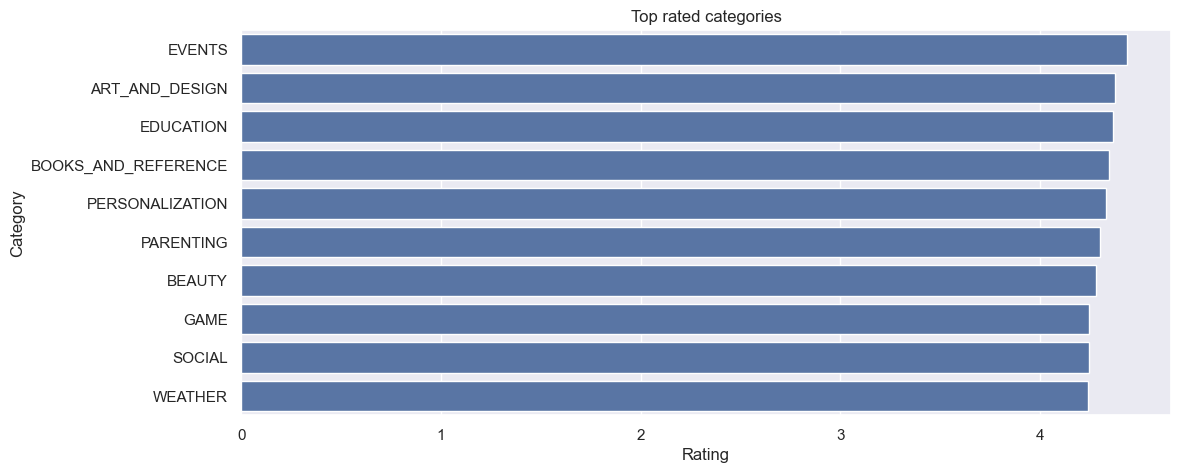

In [327]:
plt.figure(figsize=(12,5))
sns.barplot(y = top_rated_cat['category'],x = top_rated_cat['rating'])
plt.xlabel('Rating')
plt.ylabel('Category')
plt.title('Top rated categories');

### And the lowest by average rating are Dating and Tools. This explains people's unhappiness with certain kind of apps.

In [328]:
data_category_2 = data_clean.groupby('category')['rating'].mean().reset_index()
low_rated_cat = data_category_2.sort_values(by='rating', ascending=True).head(10)
low_rated_cat

,category,rating
7,DATING,3.970149
19,MAPS_AND_NAVIGATION,4.036441
29,TOOLS,4.039331
31,VIDEO_PLAYERS,4.044595
30,TRAVEL_AND_LOCAL,4.069519
18,LIFESTYLE,4.093355
4,BUSINESS,4.098479
12,FINANCE,4.115563
6,COMMUNICATION,4.121484
21,NEWS_AND_MAGAZINES,4.121569


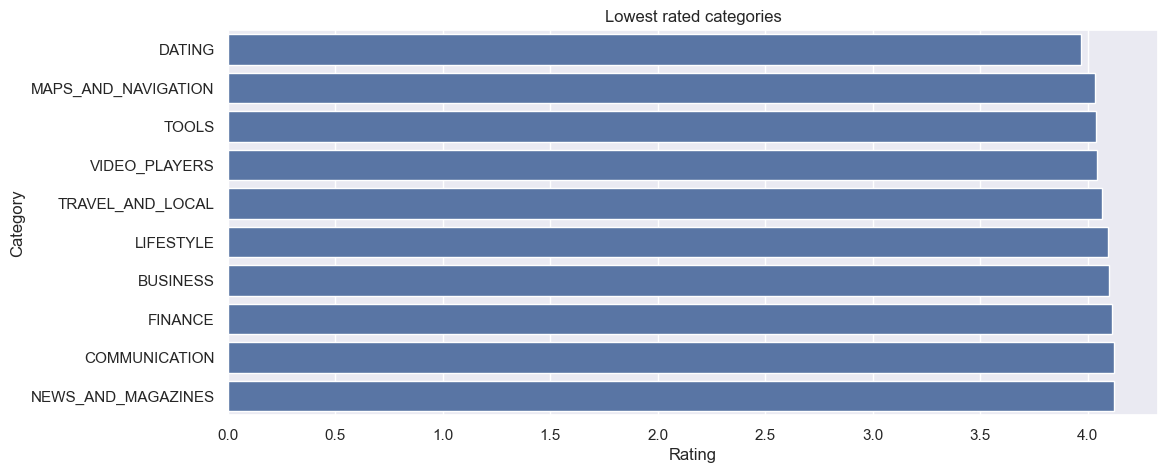

In [329]:
plt.figure(figsize=(12,5))
sns.barplot(y = low_rated_cat['category'],x = low_rated_cat['rating'])
plt.xlabel('Rating')
plt.ylabel('Category')
plt.title('Lowest rated categories');

### Next I want to look at which categories are most profitable by revenue. It won't be a perfect metric because apps don't make revenue just by selling , in app purchases are another method but still could be insightful.

In [330]:
data_category_revenue = data_clean.groupby('category')['revenue'].sum().reset_index()
data_category_revenue = data_category_revenue.sort_values(by='revenue', ascending=False).head(10)
data_category_revenue

,category,revenue
11,FAMILY,1.136243e+08
18,LIFESTYLE,5.758394e+07
14,GAME,4.068784e+07
12,FINANCE,2.572664e+07
24,PHOTOGRAPHY,8.546050e+06
23,PERSONALIZATION,6.794820e+06
20,MEDICAL,5.872355e+06
29,TOOLS,5.462910e+06
28,SPORTS,4.706154e+06
25,PRODUCTIVITY,4.304452e+06


### It seems that family , lifestyle and game are among the most sold categories.

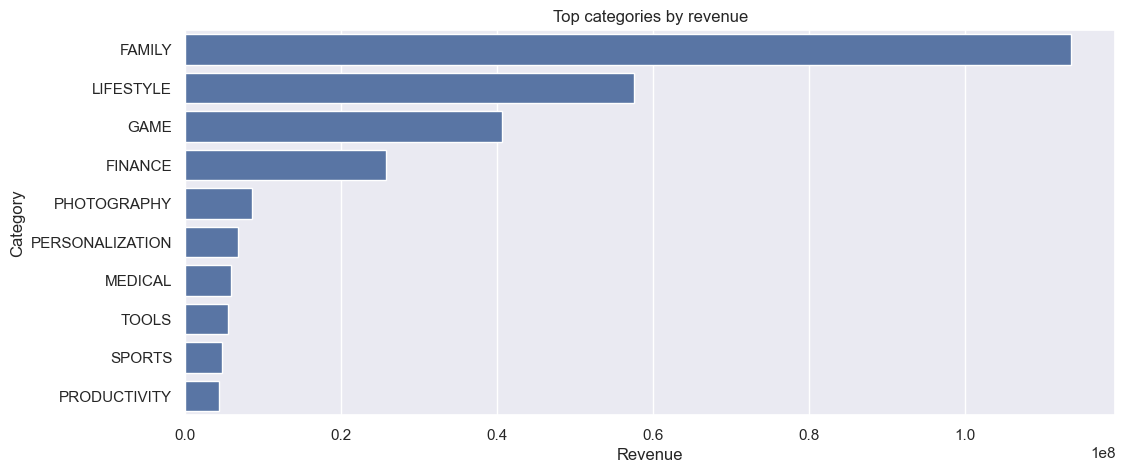

In [331]:
plt.figure(figsize=(12,5))
sns.barplot(y = data_category_revenue['category'],x = data_category_revenue['revenue'])
plt.xlabel('Revenue')
plt.ylabel('Category')
plt.title('Top categories by revenue');

In [332]:
data_category_revenue_2 = data_clean.groupby('category')['revenue'].sum().reset_index()
data_category_revenue_2 = data_category_revenue_2.sort_values(by='revenue', ascending=True).head(10)
data_category_revenue_2

,category,revenue
16,HOUSE_AND_HOME,0.0
2,BEAUTY,0.0
5,COMICS,0.0
17,LIBRARIES_AND_DEMO,0.0
10,EVENTS,0.0
27,SOCIAL,5940.0
21,NEWS_AND_MAGAZINES,6445.0
26,SHOPPING,30149.0
0,ART_AND_DESIGN,31840.0
7,DATING,47689.0


### And the lowest categories are also below.

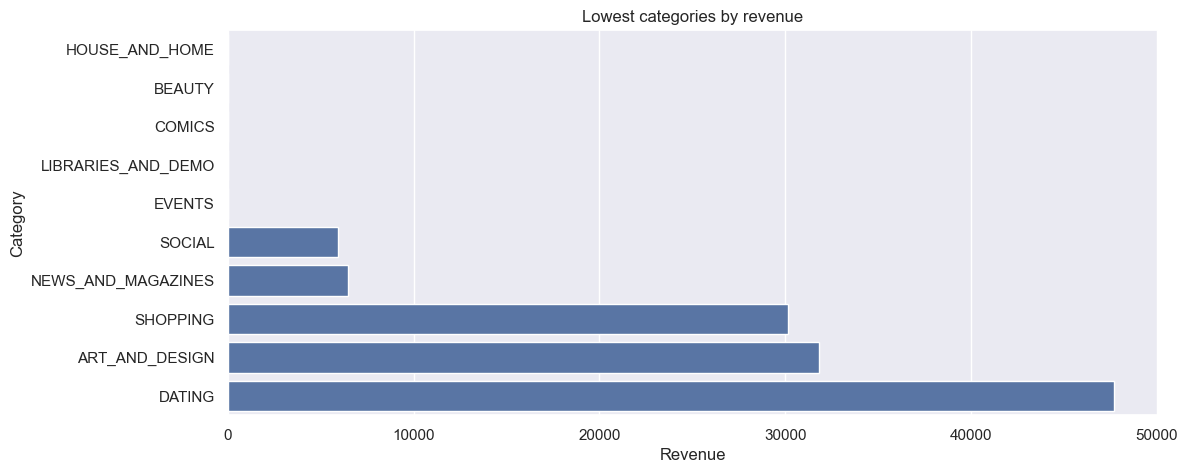

In [333]:
plt.figure(figsize=(12,5))
sns.barplot(y = data_category_revenue_2['category'],x = data_category_revenue_2['revenue'])
plt.xlabel('Revenue')
plt.ylabel('Category')
plt.title('Lowest categories by revenue');

### Next I want to see if there is correlation between the numerical variables like installs, rating and reviews. Not so surprisingly there is between number of installed apps and reviews but otherwise there is no strong correlation between any of the other metrics.

In [334]:
corr = data_clean[['rating','reviews','installs','price','revenue']].corr()
corr.style.background_gradient(cmap='coolwarm')

,rating,reviews,installs,price,revenue
rating,1.000000,0.055076,0.040131,-0.021215,0.008150
reviews,0.055076,1.000000,0.624050,-0.007791,0.006727
installs,0.040131,0.624050,1.000000,-0.009656,-0.003984
price,-0.021215,-0.007791,-0.009656,1.000000,0.269123
revenue,0.008150,0.006727,-0.003984,0.269123,1.000000


### The most expensive apps seem to be named I am rich mostly , their category is finance , family or lifestyle. They have good revenue and seem to be from more recent years, mostly 2018. Apps about being rich are selling well because people want to be rich.

In [335]:
data_clean[data_clean['price'] > 350]

,app,category,rating,reviews,installs,price,content_rating,genres,released,current_ver,android_ver,year,month,weekday,day,revenue
3175,most expensive app (H),FAMILY,4.3,6,100,399.99,0+,Entertainment,2018-07-16,1.0,7.0+,2018,7,0,16,39999.0
3301,💎 I'm rich,LIFESTYLE,3.8,718,10000,399.99,0+,Lifestyle,2018-03-11,1.0.0,4.4+,2018,3,6,11,3999900.0
3305,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,10000,400.00,0+,Lifestyle,2018-05-03,1.0.1,4.1+,2018,5,3,3,4000000.0
4097,I am rich,LIFESTYLE,3.8,3547,100000,399.99,0+,Lifestyle,2018-01-12,2.0,4.0.3+,2018,1,4,12,39999000.0
4099,I am Rich Plus,FAMILY,4.0,856,10000,399.99,0+,Entertainment,2018-05-19,3.0,4.4+,2018,5,5,19,3999900.0
4101,I Am Rich Premium,FINANCE,4.1,1867,50000,399.99,0+,Finance,2017-11-12,1.6,4.0+,2017,11,6,12,19999500.0
4102,I am extremely Rich,LIFESTYLE,2.9,41,1000,379.99,0+,Lifestyle,2018-07-01,1.0,4.0+,2018,7,6,1,379990.0
4103,I am Rich!,FINANCE,3.8,93,1000,399.99,0+,Finance,2017-12-11,1.0,4.1+,2017,12,0,11,399990.0
4104,I am rich(premium),FINANCE,3.5,472,5000,399.99,0+,Finance,2017-05-01,3.4,4.4+,2017,5,0,1,1999950.0
4107,I Am Rich Pro,FAMILY,4.4,201,5000,399.99,0+,Entertainment,2017-05-30,1.54,1.6+,2017,5,1,30,1999950.0


### The most installed apps are usually communication, game ,travel and maps kind of apps. We are nowadays mostly familiar with those , apps like whatsapp , messenger , google maps or most of google's products. Interesting thing is each of them has price of 0 , suggesting their business model is not focused on selling the app but on other methods of revenue. Also another interesting thing is that the target audience of Facebook, Instagram , Youtube and Google + seems to be teens , between 13 and 19 years old.

In [336]:
data_clean[data_clean['installs'] == 1000000000]

,app,category,rating,reviews,installs,price,content_rating,genres,released,current_ver,android_ver,year,month,weekday,day,revenue
144,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,1000000000,0.0,13-19,Books & Reference,2018-08-03,Varies with device,VwD,2018,8,4,3,0.0
286,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,1000000000,0.0,0+,Communication,2018-08-01,Varies with device,VwD,2018,8,2,1,0.0
287,WhatsApp Messenger,COMMUNICATION,4.4,69119316,1000000000,0.0,0+,Communication,2018-08-03,Varies with device,VwD,2018,8,4,3,0.0
289,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,1000000000,0.0,0+,Communication,2018-08-01,Varies with device,VwD,2018,8,2,1,0.0
291,Gmail,COMMUNICATION,4.3,4604324,1000000000,0.0,0+,Communication,2018-08-02,Varies with device,VwD,2018,8,3,2,0.0
292,Hangouts,COMMUNICATION,4.0,3419249,1000000000,0.0,0+,Communication,2018-07-21,Varies with device,VwD,2018,7,5,21,0.0
336,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,1000000000,0.0,0+,Communication,2018-08-03,Varies with device,VwD,2018,8,4,3,0.0
650,Google Play Games,ENTERTAINMENT,4.3,7165362,1000000000,0.0,13-19,Entertainment,2018-07-16,Varies with device,VwD,2018,7,0,16,0.0
1274,Subway Surfers,GAME,4.5,27722264,1000000000,0.0,10+,Arcade,2018-07-12,1.90.0,4.1+,2018,7,3,12,0.0
1870,Facebook,SOCIAL,4.1,78158306,1000000000,0.0,13-19,Social,2018-08-03,Varies with device,VwD,2018,8,4,3,0.0


### It seems most apps have a target audience with no age resriction. Their android version is around 4 at the time and it seems to be lagging even though new versions exist , which is expected since people don't update their system and phones so quickly and the apps need to be kept functional for older versions.

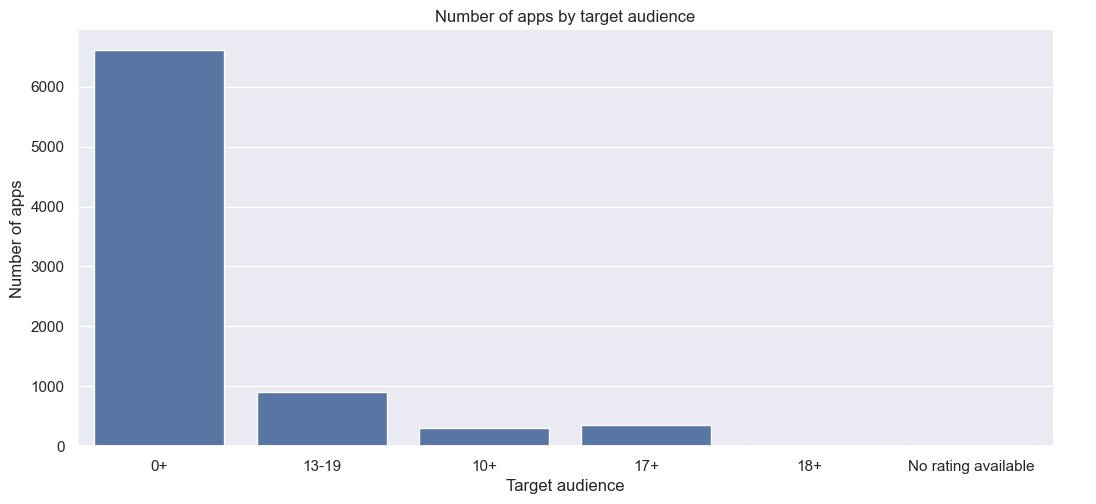

In [337]:
g = sns.catplot(x='content_rating', data=data_clean, kind='count')
g.fig.set_figwidth(12.27)
plt.xlabel('Target audience')
plt.ylabel('Number of apps')
plt.title('Number of apps by target audience');

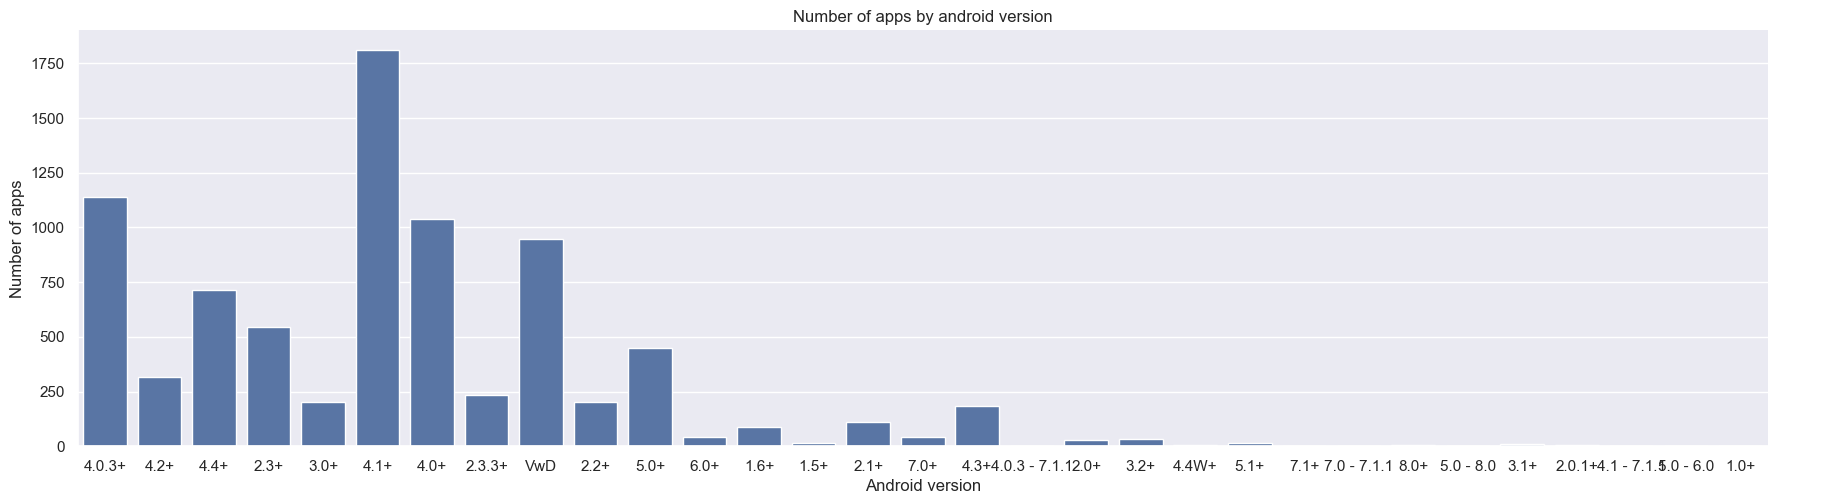

In [338]:
g = sns.catplot(x='android_ver', data=data_clean, kind='count')
g.fig.set_figwidth(21.27)
plt.xlabel('Android version')
plt.ylabel('Number of apps')
plt.title('Number of apps by android version');

### I decide to to some more digging into top rated apps.This time I pick everything with a rating above 4.8. I want to see their categories , target audience or revenue possibly.

In [339]:
data_top_rated_2 = data_clean[data_clean['rating'] > 4.8]
data_top_rated_2

,app,category,rating,reviews,installs,price,content_rating,genres,released,current_ver,android_ver,year,month,weekday,day,revenue
53,Tickets SDA 2018 and Exam from the State Traff...,AUTO_AND_VEHICLES,4.9,10479,100000,0.0,0+,Auto & Vehicles,2018-07-18,1.7.1,4.0+,2018,7,2,18,0.0
59,CDL Practice Test 2018 Edition,AUTO_AND_VEHICLES,4.9,7774,100000,0.0,0+,Auto & Vehicles,2018-07-03,1.7,4.2+,2018,7,1,3,0.0
62,DMV Permit Practice Test 2018 Edition,AUTO_AND_VEHICLES,4.9,6090,100000,0.0,0+,Auto & Vehicles,2018-07-03,1.7,4.2+,2018,7,1,3,0.0
77,Tickets + PDA 2018 Exam,AUTO_AND_VEHICLES,4.9,197136,1000000,0.0,0+,Auto & Vehicles,2018-07-15,8.31,4.1+,2018,7,6,15,0.0
97,"ipsy: Makeup, Beauty, and Tips",BEAUTY,4.9,49790,1000000,0.0,0+,Beauty,2017-11-09,2.3.0,4.1+,2017,11,3,9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8125,GKPB FP Online Church,LIFESTYLE,5.0,32,1000,0.0,0+,Lifestyle,2017-12-31,0.7.1,4.4+,2017,12,6,31,0.0
8143,Monster Ride Pro,GAME,5.0,1,10,0.0,0+,Racing,2018-03-05,2.0,2.3+,2018,3,0,5,0.0
8165,Fr Ignacio Outreach,FAMILY,4.9,52,1000,0.0,0+,Education,2018-01-19,1.0,4.4+,2018,1,4,19,0.0
8177,Fr. Daoud Lamei,FAMILY,5.0,22,1000,0.0,13-19,Education,2018-06-27,3.8.0,4.1+,2018,6,2,27,0.0


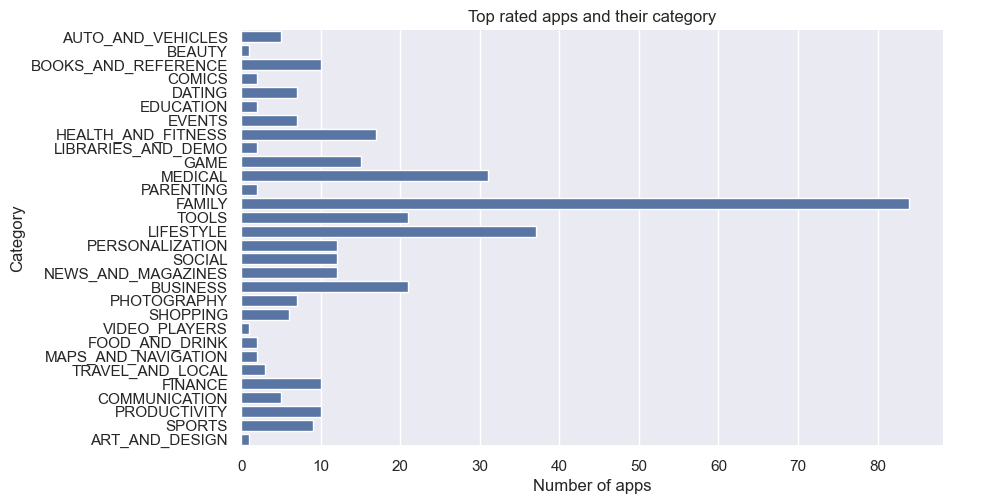

In [340]:
g = sns.catplot(y='category', data=data_top_rated_2, kind='count')
g.fig.set_figwidth(15)
plt.ylabel('Category')
plt.xlabel('Number of apps')
plt.title('Top rated apps and their category');

In [341]:
top_rated_grouped = data_top_rated_2.groupby('category')['revenue'].sum().reset_index()
top_rated_grouped = top_rated_grouped.sort_values(by='revenue',ascending=False).head(10)
top_rated_grouped

,category,revenue
13,GAME,499111.88
16,LIFESTYLE,10079.40
8,EDUCATION,3990.00
27,TOOLS,2203.90
18,MEDICAL,1794.00
21,PERSONALIZATION,1505.30
19,NEWS_AND_MAGAZINES,1495.00
10,FAMILY,1322.40
3,BOOKS_AND_REFERENCE,486.50
23,PRODUCTIVITY,9.90


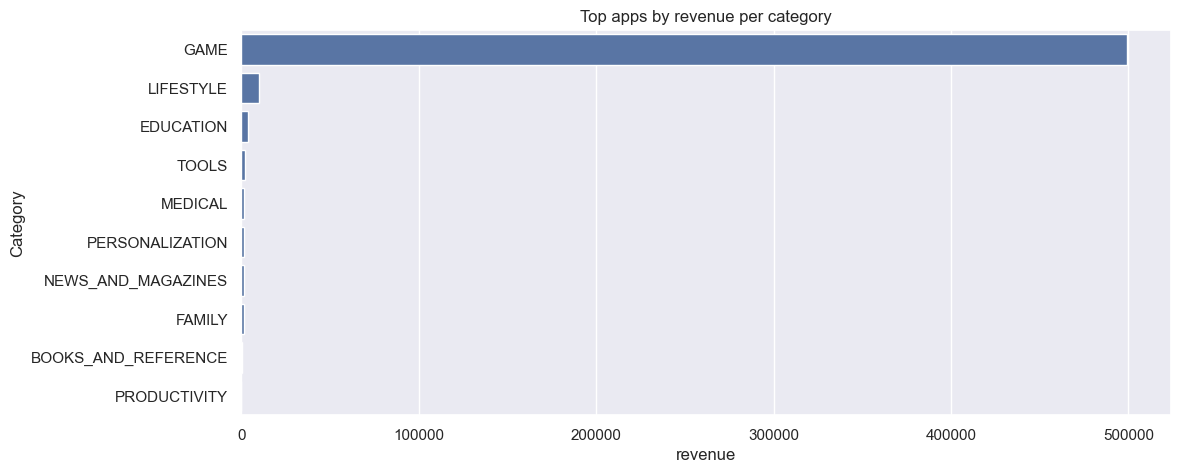

In [342]:
plt.figure(figsize=(12,5))
sns.barplot(y = top_rated_grouped['category'],x = top_rated_grouped['revenue'])
plt.xlabel('revenue')
plt.ylabel('Category')
plt.title('Top apps by revenue per category');

### It seems Games are selling really well.

### In conclusion there is exponentila increase in app release as the years go by. The summer sees most realeases and week days are where most apps are released. The highes average rated categories are Event , Art and Design , Education while lowest are Dating , Tools , Maps and communication. Most sold categories are Family , Lifestyle and Game. Most expensive apps are about being rich and the most installed apps are very well known names like Facebook , Messenger , Whatsapp , Instagram , Youtube and so on. A majority of apps don't target specific age group but there is a portion that is directed specifically at people between 13 and 19. The single most rated apps above 4.8 rating are 358 entries with Family , Tools and Lifestyle being big ones and most revenue being in the Game category.